<a href="https://colab.research.google.com/github/jaeyoonjeong9024/8-weeks/blob/main/CNN%2BLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns



def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


def load_dataset(prefix=''):
  # load all train
  trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/')
  # load all test
  testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/')

  trainy = trainy - 1
  testy = testy - 1
  trainy_one_hot = to_categorical(trainy)
  testy_one_hot = to_categorical(testy)
  print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
  return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

from sklearn.model_selection import train_test_split

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.2,random_state=100)

X_train.shape,X_val.shape,y_train_one_hot.shape,y_val_one_hot.shape,y_train.shape,y_val.shape

/tmp/ipython-input-654143682.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-654143682.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-654143682.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-654143682.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


/tmp/ipython-input-654143682.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


((5881, 128, 9), (1471, 128, 9), (5881, 6), (1471, 6), (5881, 1), (1471, 1))

In [13]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_one_hot.shape[1]

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, Conv1D, MaxPooling1D

##
# 1.
inputs = Input(shape=(n_timesteps, n_features))

# 2.
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)

pool1 = MaxPooling1D(pool_size=2)(conv1)


# 3.
lstm1 = LSTM(128)(pool1)

# 4.
dense = Dense(128, activation='relu')(lstm1)
outputs = Dense(n_outputs, activation='softmax')(dense)

cnn_lstm_model = Model(inputs, outputs)

In [15]:
# 5.
cnn_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_lstm_model.summary()
# 6.
model_history = cnn_lstm_model.fit(
    x=X_train,
    y=y_train_one_hot,
    epochs=30,
    batch_size=32,
    validation_split=0.1
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 9)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 126, 64)        │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,894 (460.52 KB)

 Trainable params: 117,894 (460.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.5979 - loss: 0.9479 - val_accuracy: 0.8523 - val_loss: 0.3403
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.8587 - loss: 0.3941 - val_accuracy: 0.9015 - val_loss: 0.2303
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.9083 - loss: 0.2388 - val_accuracy: 0.9151 - val_loss: 0.1895
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 19s 102ms/step - accuracy: 0.9157 - loss: 0.2302 - val_accuracy: 0.9440 - val_loss: 0.1336
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.9466 - loss: 0.1378 - val_accuracy: 0.9202 - val_loss: 0.2049
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 17s 102ms/step - accuracy: 0.9326 - loss: 0.1902 - val_accuracy: 0.9202 - val_loss: 0.3021
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.9147 - loss: 0.2385 - val_accuracy: 0.9474 - val_loss: 0.1368
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 107ms/step - accuracy: 0.9409 - loss: 0

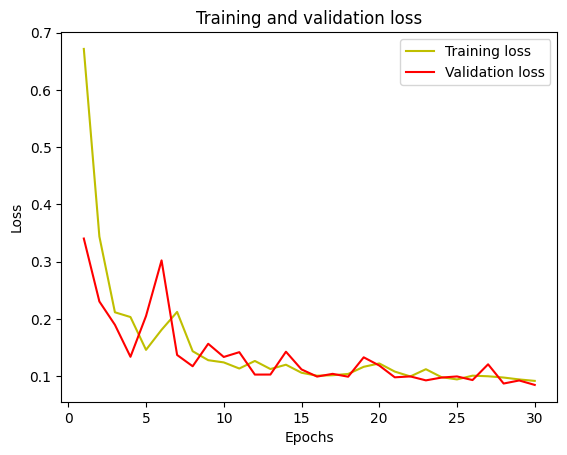

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

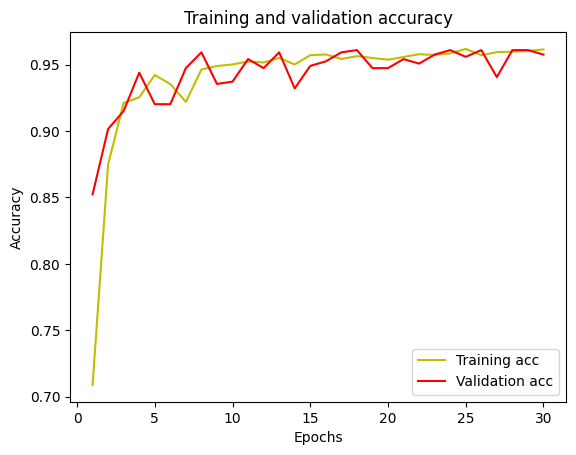

In [17]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step
[[467   6  23   0   0   0]
 [ 11 450  10   0   0   0]
 [  5   5 410   0   0   0]
 [  0  23   2 376  90   0]
 [  0   1   1  86 444   0]
 [  0  27   0   0   0 510]]
0.9015948422124194
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       496
           1       0.88      0.96      0.92       471
           2       0.92      0.98      0.95       420
           3       0.81      0.77      0.79       491
           4       0.83      0.83      0.83       532
           5       1.00      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



<Axes: >

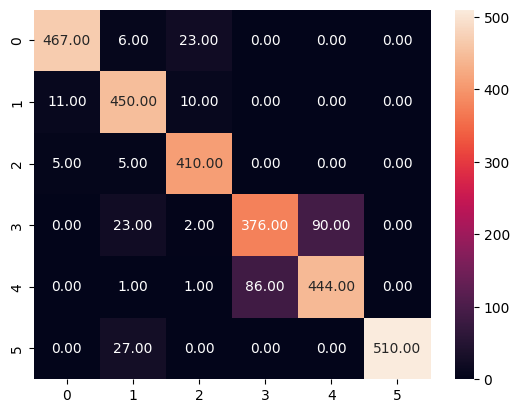

In [18]:
 from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

pred = cnn_lstm_model.predict(testX)
pred = np.argmax(pred, axis=-1)

cm = confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')